## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0810 16:55:50.491627 11648 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 16:55:50.504593 11648 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 16:55:50.507585 11648 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0810 16:55:51.266816 11648 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 16:55:51.271802 11648 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0810 16:55:54.714219 11648 deprecation.py:323] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0810 16:55:54.752127 11648 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 85us/step - loss: 2.2811 - acc: 0.1381 - val_loss: 2.2281 - val_acc: 0.1821
Epoch 2/500
50000/50000 [==============================] - 4s 80us/step - loss: 2.1919 - acc: 0.2083 - val_loss: 2.1624 - val_acc: 0.2331
Epoch 3/500
50000/50000 [==============================] - 4s 79us/step - loss: 2.1348 - acc: 0.2455 - val_loss: 2.1138 - val_acc: 0.2573
Epoch 4/500
50000/50000 [==============================] - 4s 79us/step - loss: 2.0902 - acc: 0.2658 - val_loss: 2.0730 - val_acc: 0.2714
Epoch 5/500
50000/50000 [==============================] - 4s 79us/step - loss: 2.0542 - acc: 0.2805 - val_loss: 2.0408 - val_acc: 0.2834
Epoch 6/500
50000/50000 [==============================] - 4s 79us/step - loss: 2.0248 - acc: 0.2922 - val_loss: 2.0145 - val_acc: 0.2938
Epoch 7/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.9994 - acc: 0.3039 - val_loss: 1.9916 - 

50000/50000 [==============================] - 4s 80us/step - loss: 1.6540 - acc: 0.4253 - val_loss: 1.6624 - val_acc: 0.4195
Epoch 60/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.6514 - acc: 0.4264 - val_loss: 1.6577 - val_acc: 0.4241
Epoch 61/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.6483 - acc: 0.4277 - val_loss: 1.6584 - val_acc: 0.4224
Epoch 62/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.6456 - acc: 0.4289 - val_loss: 1.6535 - val_acc: 0.4268
Epoch 63/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.6427 - acc: 0.4301 - val_loss: 1.6522 - val_acc: 0.4255
Epoch 64/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.6397 - acc: 0.4314 - val_loss: 1.6480 - val_acc: 0.4260
Epoch 65/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.6371 - acc: 0.4316 - val_loss: 1.6457 - val_acc: 0.4266
Epoch 66/500
50000/50000 [==============

50000/50000 [==============================] - 4s 81us/step - loss: 1.5202 - acc: 0.4716 - val_loss: 1.5464 - val_acc: 0.4600
Epoch 118/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.5183 - acc: 0.4709 - val_loss: 1.5459 - val_acc: 0.4603
Epoch 119/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.5163 - acc: 0.4721 - val_loss: 1.5414 - val_acc: 0.4586
Epoch 120/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.5148 - acc: 0.4737 - val_loss: 1.5442 - val_acc: 0.4593
Epoch 121/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.5129 - acc: 0.4741 - val_loss: 1.5387 - val_acc: 0.4620
Epoch 122/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.5110 - acc: 0.4735 - val_loss: 1.5390 - val_acc: 0.4619
Epoch 123/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.5096 - acc: 0.4753 - val_loss: 1.5382 - val_acc: 0.4608
Epoch 124/500
50000/50000 [=======

50000/50000 [==============================] - 4s 80us/step - loss: 1.4252 - acc: 0.5023 - val_loss: 1.4751 - val_acc: 0.4781
Epoch 176/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.4237 - acc: 0.5042 - val_loss: 1.4780 - val_acc: 0.4812
Epoch 177/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.4223 - acc: 0.5041 - val_loss: 1.4752 - val_acc: 0.4807
Epoch 178/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.4209 - acc: 0.5038 - val_loss: 1.4743 - val_acc: 0.4794
Epoch 179/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.4191 - acc: 0.5051 - val_loss: 1.4708 - val_acc: 0.4820
Epoch 180/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.4181 - acc: 0.5042 - val_loss: 1.4709 - val_acc: 0.4807
Epoch 181/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.4166 - acc: 0.5050 - val_loss: 1.4684 - val_acc: 0.4818
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 4s 80us/step - loss: 1.3456 - acc: 0.5306 - val_loss: 1.4248 - val_acc: 0.4934
Epoch 234/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.3443 - acc: 0.5296 - val_loss: 1.4317 - val_acc: 0.4940
Epoch 235/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.3431 - acc: 0.5301 - val_loss: 1.4262 - val_acc: 0.4944
Epoch 236/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3415 - acc: 0.5310 - val_loss: 1.4348 - val_acc: 0.4903
Epoch 237/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3406 - acc: 0.5309 - val_loss: 1.4436 - val_acc: 0.4874
Epoch 238/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3395 - acc: 0.5321 - val_loss: 1.4261 - val_acc: 0.4910
Epoch 239/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.3385 - acc: 0.5318 - val_loss: 1.4285 - val_acc: 0.4946
Epoch 240/500
50000/50000 [=======

50000/50000 [==============================] - 4s 80us/step - loss: 1.2754 - acc: 0.5528 - val_loss: 1.3908 - val_acc: 0.5068
Epoch 292/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2746 - acc: 0.5517 - val_loss: 1.3875 - val_acc: 0.5047
Epoch 293/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2741 - acc: 0.5530 - val_loss: 1.4258 - val_acc: 0.4961
Epoch 294/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2726 - acc: 0.5531 - val_loss: 1.4381 - val_acc: 0.4896
Epoch 295/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.2717 - acc: 0.5539 - val_loss: 1.4027 - val_acc: 0.5019
Epoch 296/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.2701 - acc: 0.5541 - val_loss: 1.3947 - val_acc: 0.5042
Epoch 297/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.2690 - acc: 0.5540 - val_loss: 1.3958 - val_acc: 0.5039
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 4s 84us/step - loss: 1.2125 - acc: 0.5741 - val_loss: 1.3651 - val_acc: 0.5139
Epoch 350/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2111 - acc: 0.5759 - val_loss: 1.3941 - val_acc: 0.5067
Epoch 351/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.2096 - acc: 0.5741 - val_loss: 1.3722 - val_acc: 0.5125
Epoch 352/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.2072 - acc: 0.5770 - val_loss: 1.3771 - val_acc: 0.5064
Epoch 353/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.2075 - acc: 0.5765 - val_loss: 1.3732 - val_acc: 0.5098
Epoch 354/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.2058 - acc: 0.5763 - val_loss: 1.3653 - val_acc: 0.5134
Epoch 355/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.2056 - acc: 0.5773 - val_loss: 1.3708 - val_acc: 0.5146
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 4s 78us/step - loss: 1.1515 - acc: 0.5975 - val_loss: 1.3482 - val_acc: 0.5196
Epoch 408/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.1516 - acc: 0.5969 - val_loss: 1.3612 - val_acc: 0.5136
Epoch 409/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.1489 - acc: 0.5981 - val_loss: 1.3670 - val_acc: 0.5137
Epoch 410/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.1465 - acc: 0.5994 - val_loss: 1.3467 - val_acc: 0.5196
Epoch 411/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.1478 - acc: 0.5977 - val_loss: 1.3441 - val_acc: 0.5252
Epoch 412/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.1453 - acc: 0.5993 - val_loss: 1.3885 - val_acc: 0.5145
Epoch 413/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.1451 - acc: 0.5993 - val_loss: 1.3546 - val_acc: 0.5219
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 4s 79us/step - loss: 1.0914 - acc: 0.6172 - val_loss: 1.3542 - val_acc: 0.5233
Epoch 466/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.0892 - acc: 0.6185 - val_loss: 1.3826 - val_acc: 0.5130
Epoch 467/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.0888 - acc: 0.6191 - val_loss: 1.3585 - val_acc: 0.5220
Epoch 468/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.0893 - acc: 0.6187 - val_loss: 1.3352 - val_acc: 0.5273
Epoch 469/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.0883 - acc: 0.6195 - val_loss: 1.3690 - val_acc: 0.5172
Epoch 470/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.0857 - acc: 0.6213 - val_loss: 1.3446 - val_acc: 0.5220
Epoch 471/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.0863 - acc: 0.6184 - val_loss: 1.4894 - val_acc: 0.4860
Epoch 472/500
50000/50000 [=======

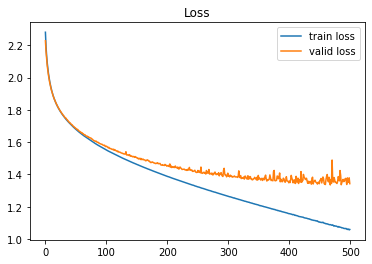

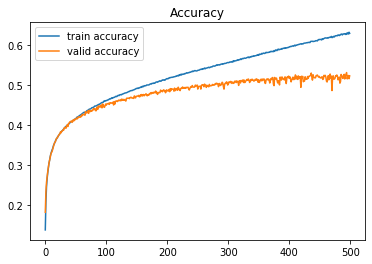

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()